<a href="https://colab.research.google.com/github/nepomucenoc/modelagem/blob/main/n_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measure of Similarity Between Texts - Containment

In this notebook, we will implement a *containment* function. This function will compare two texts and analyze the similarity in relation to *n-grams* intersection. First, we will understand the vocabulary concepts, and n-grams to posteriorly implement the function.

## Count N-grams

Sequency of the n elements in a phrase:

*   letters
*   words
*   symbols
*   grammar classification

First we have to count the occurrences of n-grams of our texts. We will use CountVectorizer to convert the text dataset into a count array.

In the code below, we can vary the value of n and use the CountVectorizer to count occurrences of n grams. We can see that in the cell below we are creating a vocabulary through the use of the CountVectorizer and, later, we will analyze the count matrix.

In [1]:
import numpy as np
import sklearn

## Unigram

running the example prints the vocabulary. We can see that there are 8 words in the vocabulary and therefore encoded arrays also have a length of 8.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

text_compare = "Suppose this is the text I want to compare"
text_font = "Assume this is the main text"

#Number of n-grams
n = 1

#Instantiate the n-gram counter
counts = CountVectorizer(analyzer='word', ngram_range=(n,n))

#Create a dictionary of n-grams
vocab2int = counts.fit([text_compare,text_font]).vocabulary_

#Print dictionary of words: index
print(vocab2int)

{'suppose': 4, 'this': 7, 'is': 2, 'the': 6, 'text': 5, 'want': 9, 'to': 8, 'compare': 1, 'assume': 0, 'main': 3}


## Bigram

The same goes for the case of bigrams. we have 8 bigrams in the vocabulary and therefore the encoded vectors in length 8.

In [3]:
#Number of n-grams
n = 2

#Instantiate the n-gram counter
counts = CountVectorizer(analyzer='word', ngram_range=(n,n))

#Create a dictionary of n-grams
vocab2int = counts.fit([text_compare,text_font]).vocabulary_

#Print dictionary of words: index
print(vocab2int)

{'suppose this': 3, 'this is': 7, 'is the': 1, 'the text': 6, 'text want': 4, 'want to': 9, 'to compare': 8, 'assume this': 0, 'the main': 5, 'main text': 2}


## Trigram

In [4]:
#Number of n-grams
n = 3

#Instantiate the n-gram counter
counts = CountVectorizer(analyzer='word', ngram_range=(n,n))

#Create a dictionary of n-grams
vocab2int = counts.fit([text_compare,text_font]).vocabulary_

#Print dictionary of words: index
print(vocab2int)

{'suppose this is': 3, 'this is the': 7, 'is the text': 2, 'the text want': 6, 'text want to': 4, 'want to compare': 8, 'assume this is': 0, 'is the main': 1, 'the main text': 5}


## Vocabulary Words

Note that the article "o" of the phrases text_compare and text_font does not appear in the vocabulary. Also note that all sentences are in lower case. this is due to the fact that when we pass the parameter analyser = 'word', we are considering in our analysis words with two or more characters and consequently ignoring words with only one character. Excluding these characters (articles) is a standard and desired behavior in many text analyzes due to their irrelevance in most textual analyses.

In case you need to bypass CountVectorizer's default pattern and add single-character words to your analysis, you can add the token_pattern argument by passing a select REGEX. This regular expression (REGEX) defines word as having one or more characters.

## Array of n-grams

Let's use CountVectorizer to create an array of n-gram counts. Also, let's create two sentences that we want to analyze, and transform each text into a numerical vector representing the occurrence of each word.

Note that each line represents a text and each column or index represents the vocabulary terms. We will see this clearly in the mapping below.

*  text_compare
*  text_font

In [6]:
#Number of n-grams
n = 1

#Instantiate the n-gram counter
counts = CountVectorizer(analyzer='word', ngram_range=(n,n))

#Count of n-grams Matrix between two texts
n_grams = counts.fit_transform([text_compare,text_font])

#Create a dictionary of n-grams
vocab2int = counts.fit([text_compare,text_font]).vocabulary_

n_grams_array = n_grams.toarray()

print('N-grams Vector:\n\n', n_grams_array)
print()
print('N-grams Dictionary (unigram):\n\n', vocab2int)

N-grams Vector:

 [[0 1 1 0 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 1 0 0]]

N-grams Dictionary (unigram):

 {'suppose': 4, 'this': 7, 'is': 2, 'the': 6, 'text': 5, 'want': 9, 'to': 8, 'compare': 1, 'assume': 0, 'main': 3}


Above we have the vectors that encode each text. On the top line we have the n-grams of the text_compare and on the bottom line we have the encoding of the text_font. We can analyze whether the texts have n_grams in common through their columns.

## Containment Values

Cotainment is nothing more than a measure of similarity between texts. It is basically a normalization of the n-gram count intersection between the texts.

First, we need to extract the words from the two text documents to form a corpus. Next, we count the intersection of n-grams (sequential groupings of words of n words) between the texts. For the case of unigrams, we can consider it as a count of the number of words that both texts have in common.

Then we divide the value by the total n-grams of the text to be compared (subscript A - which wants to be compared with the source text) to normalize the value.

Containment Calculation:

1. Calculate the n-gram intersection between text and source text.
2. Add the number of common terms.
3. Normalize the value in step 2 by the number of n-grams in text A.

Below we can see the equation of the Containment:

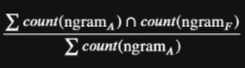

In [7]:
n_grams

<2x10 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [8]:
n_grams.toarray()

array([[0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 0, 0]])

In [9]:
intersection_list = np.amin(n_grams.toarray(), axis = 0)
intersection_list

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [10]:
intersection_count = np.sum(intersection_list)
intersection_count

4

In [11]:
index_A = 0
A_count = np.sum(n_grams.toarray()[index_A])
A_count

8

In [12]:
intersection_count/A_count

0.5

## Function that takes an array of n-grams

In [16]:
def containment(n_gram_array):
  """
  Calculates the containment between two texts. Normalizes the intersection of n-gram counters between texts.

  arg: n_gram_array(array): An array with the n-gram counts of the two texts to be compared

  return: the normalized containment value
  """

  # Creates a list that contains the minimum value found in the columns

  # 0 if there are no matches and 1 for matched words

  intersection_list = np.amin(n_gram_array,axis = 0)

  # Sum of the intersection number
  intersection_count = np.sum(intersection_list)

  # Count number of the n-grams in text 1
  A_idx = 0
  A_count = np.sum(n_gram_array[A_idx])

  # Normalize and calculate the final value
  containment_val = intersection_count / A_count

  return containment_val

### To n-gram calculate before and n=1

In [17]:
containment_val = containment(n_grams.toarray())

print('Containment: ', containment_val)

Containment:  0.5


### To n=2

In [18]:
# To n=n
counts_2grams = CountVectorizer(analyzer='word', ngram_range=(2,2))
bigram_counts = counts_2grams.fit_transform([text_compare,text_font])

#calculate containment
containment_val = containment(bigram_counts.toarray())

print('Containment for n=2: ', containment_val)

Containment for n=2:  0.2857142857142857
